In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def procrustes(X, Y, scaling=True, reflection='best'):
    
    # X.shape --> (3,2)
    # 3行2列
    n,m = X.shape
    ny,my = Y.shape
    
    # 列平均
    muX = X.mean(0)
    muY = Y.mean(0)
    
    print("muX = ", muX.shape, muX)

    X0 = X - muX
    Y0 = Y - muY
    
    print("X0 =", X0.shape)
    print(X0)
    print("X0**2", X0**2)

    ssX = (X0**2.).sum()
    ssY = (Y0**2.).sum()
    
    print("SSX =", ssX)

    # centred Frobenius norm
    normX = np.sqrt(ssX)
    normY = np.sqrt(ssY)
    print("normX = ", normX)

    # scale to equal (unit) norm
    X0 /= normX
    Y0 /= normY

    if my < m:
        Y0 = np.concatenate((Y0, np.zeros(n, m-my)),0)

    # optimum rotation matrix of Y
    print("\nX0.T = " , X0.T)
    print("Y0 = ", Y0)
    A = np.dot(X0.T, Y0)
    print("A = ", A)
    U,s,Vt = np.linalg.svd(A,full_matrices=False)
    V = Vt.T
    T = np.dot(V, U.T)

    traceTA = s.sum()

    # optimum scaling of Y
    b = traceTA * normX / normY

    # standarised distance between X and b*Y*T + c
    d = 1 - traceTA**2

    # transformed coords
    Z = normX*traceTA*np.dot(Y0, T) + muX

    # transformation matrix
    if my < m:
        T = T[:my,:]
    c = muX - b*np.dot(muY, T)
    
    #transformation values 
    tform = {'rotation':T, 'scale':b, 'translation':c}
   
    return d, Z, tform

muX =  (2,) [2.         0.33333333]
X0 = (3, 2)
[[-1.          0.66666667]
 [ 1.          0.66666667]
 [ 0.         -1.33333333]]
X0**2 [[1.         0.44444444]
 [1.         0.44444444]
 [0.         1.77777778]]
SSX = 4.666666666666667
normX =  2.160246899469287

X0.T =  [[-0.46291005  0.46291005  0.        ]
 [ 0.3086067   0.3086067  -0.6172134 ]]
Y0 =  [[-0.4199242  -0.25092372]
 [-0.06976005  0.61768258]
 [ 0.48968425 -0.36675886]]
A =  [[ 0.1620945   0.40208658]
 [-0.45335952  0.33955272]]
[[ 1  1]
 [ 3  1]
 [ 2 -1]]
[[1.89820457 2.62936427]
 [2.28639948 3.59230849]
 [2.90660411 2.50094847]]
[[ 1.08123505  0.83742119]
 [ 3.06586413  1.13161955]
 [ 1.85290082 -0.96904074]]


(-2.0, 5.0)

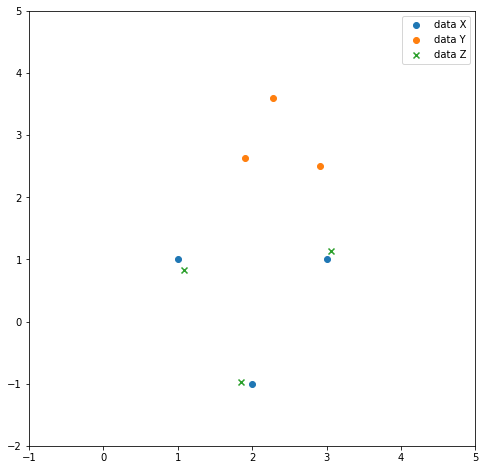

In [55]:
np.random.seed(1)

X = np.array([
    [1,1],
    [3,1],
    [2,-1]
])

rot = np.array([
    [0.5, -np.sqrt(3)/2],
    [np.sqrt(3)/2, 0.5]
])

Y = (0.5*rot@X.T + np.random.normal(0, 0.05, (2,3)) ).T + 2

d, Z, tform = procrustes(X, Y)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], label="data X")
ax.scatter(Y[:,0], Y[:,1], label="data Y")
ax.scatter(Z[:,0], Z[:,1], label="data Z", marker="x")
ax.legend()

print(X)
print(Y)
print(Z)

ax.set_xlim(-1,5)
ax.set_ylim(-2,5)

In [49]:
0.66**2

0.43560000000000004

In [24]:
X.shape

(3, 2)

In [25]:
X

array([[ 1,  1],
       [ 3,  1],
       [ 2, -1]])

In [29]:
X.mean(0)

array([2.        , 0.33333333])

In [31]:
np.sum(X, 0)/3

array([2.        , 0.33333333])